In [33]:
import numpy as np
import os
import matplotlib.pyplot as plt
import json

In [34]:
#sub_dir = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/2024-02-26/'
sub_dir = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/1-5mm_STS_babies/'

In [35]:
#models = ['17-16-30_112', '18-37-28_0', '18-37-28_1', '18-37-28_2', '18-37-28_3', '18-37-28_4']
#models = ['14-35-49_163', '21-38-51_0', '21-38-51_1', '21-38-51_2', '21-38-51_3']
#models = ['11-45-15_0', '11-45-15_1', '11-45-15_2', '11-45-15_3', '11-45-15_4']
#models = ['19-57-02_0', '19-57-02_1', '19-57-02_2']
#models = ['12-12-35_0']
#models = ['14-17-27_0', '14-17-27_1', '14-17-27_2', '14-17-27_3']
#models = ['16-44-39_0', '16-44-39_1', '16-44-39_2', '16-44-39_3']
#models = ['17-19-54_0', '17-19-54_1', '17-19-54_2', '17-19-54_3']
#models = ['random_all_keep_bottom_5', 'random_all_keep_bottom_6', 'random_all_keep_bottom_7', 'random_all_keep_bottom_8', 'random_all_keep_bottom_9', 'random_all_keep_bottom_10']
#models = ['14-17-27_0', '14-17-27_1', '14-17-27_2', '14-17-27_3']
#models = [f'1-5mm_L4_{k}' for k in range(5)]
models = [f'16-36-43_{k}' for k in range(3)]
epochs = [k for k in range(0, 250, 10)]
#models = ['random_all_keep_bottom_5']
#epochs = [k for k in range(0, 250)]

In [37]:
dict_perf

{'16-36-43_0': [], '16-36-43_1': [], '16-36-43_2': [], 'epoch': []}

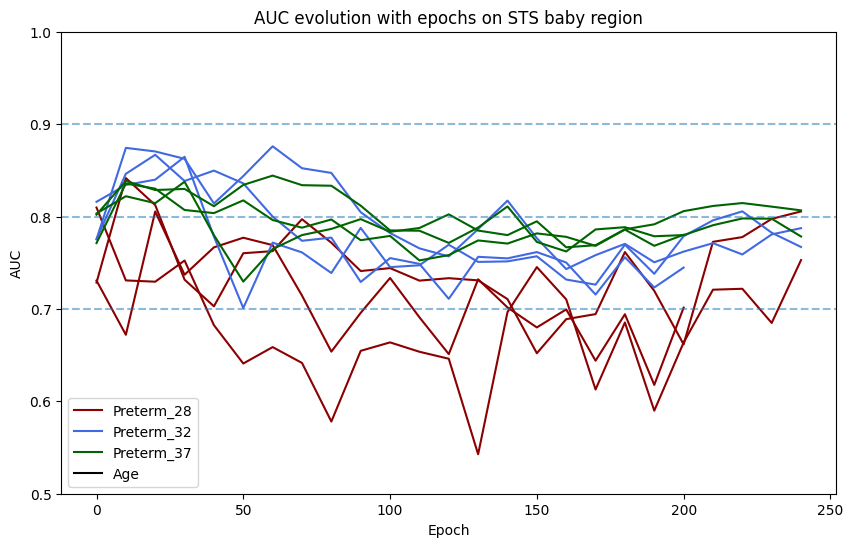

In [36]:
#target = 'train_val_values.json'
embeddings = ['dHCP', 'dHCP', 'dHCP', 'UKB_5percent']
labels = ['Preterm_28', 'Preterm_32', 'Preterm_37', 'Age']
sets = ['full', 'full', 'full', 'full']
colors = ['darkred', 'royalblue', 'darkgreen', 'black']
#metric = 'train_val_auc'
fig, ax = plt.subplots(figsize=(10,6))

for embedding, label, s, c in zip(embeddings, labels, sets, colors):
    metric, target = f'{s}_auc', f'{s}_values.json'
    selected_models_dirs = [root for root, dirs, files in os.walk(sub_dir, followlinks=True)
                                    if (target in files) & (root.endswith(label)) & (embedding in root) & ('best_model' not in root)]
    dict_perf = {model : [] for model in models}
    dict_perf['epoch'] = []
    for model in models:
        for epoch in epochs:
            for directory in selected_models_dirs:
                if ('epoch'+str(epoch)+'_' in directory) and (model in directory):
                    with open(os.path.join(directory,target), 'r') as f:
                        perf = json.load(f)
                    if isinstance(perf[metric], float):
                        value = perf[metric]
                    else:
                        value = perf[metric][0]
                    dict_perf['epoch'].append(epoch)
                    dict_perf[model].append(value)
    for i, model in enumerate(models):
        if model in dict_perf.keys():
            x, y = epochs, dict_perf[model]
            if i==0:
                plt.plot(x[:len(y)], y, label=label, c=c)
            else:
                plt.plot(x[:len(y)], y, c=c)
plt.axline((0, 0.90), (1, 0.90), linestyle='--', alpha=0.5)
plt.axline((0, 0.80), (1, 0.80), linestyle='--', alpha=0.5)
plt.axline((0, 0.70), (1, 0.70), linestyle='--', alpha=0.5)
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.title(f'AUC evolution with epochs on STS baby region')
plt.ylim([0.5, 1])
plt.show()